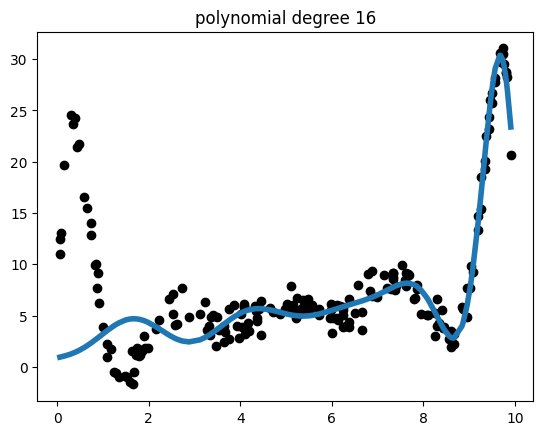

In [28]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(4)

# data generation
x_p = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_p = np.array([2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 10])
poly = inter.lagrange(x_p, y_p)
def f(x):
    X = np.concatenate(
        [(x**a)[:, np.newaxis] for a in range(len(poly.coef))],
        axis = 1
    )
    return np.dot(X, poly.coef[::-1][:, np.newaxis]).ravel()

y = lambda x: f(x) + np.random.normal(0, 1, x.shape)

X_sample = np.sort(np.random.uniform(0, 10, 200))
Y_sample = y(X_sample)


# models
def get_poly_matrix(X, p = 2):
    return np.concatenate(
        [np.array(X)[:, np.newaxis]**(i) for i in range(p+1)],
        axis = 1
    )
def get_poly_predict(X, y, p = 2):
    
    X_matr = get_poly_matrix(X, p)
    return LinearRegression(
        fit_intercept=False
    ).fit(X_matr, y).predict(X_matr)


CHANGE_ME = 16
plt.scatter(X_sample, Y_sample, color = "black")
plt.title("polynomial degree " + str(CHANGE_ME))
plt.plot(
    X_sample,
    get_poly_predict(X_sample, Y_sample, CHANGE_ME),
    linewidth = 4
)
plt.savefig("poly16.png")